# Imports and Setup

In [3]:
#%pip install transformers

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import transformers
from transformers import pipeline

In [9]:
df = pd.read_csv('data/webmd.csv')
df
### From Other Notebook
df['Date'] = df['Date'].astype('datetime64[ns]')
df = df.drop_duplicates('Reviews')
# All Osteoporosis Illnesses in Female Patients
df_ost = df[df['Condition'].str.contains("osteoporosis", case = False)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250168 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            250167 non-null  object        
 1   Condition      250168 non-null  object        
 2   Date           250168 non-null  datetime64[ns]
 3   Drug           250168 non-null  object        
 4   DrugId         250168 non-null  int64         
 5   EaseofUse      250168 non-null  int64         
 6   Effectiveness  250168 non-null  int64         
 7   Reviews        250167 non-null  object        
 8   Satisfaction   250168 non-null  int64         
 9   Sex            250168 non-null  object        
 10  Sides          250168 non-null  object        
 11  UsefulCount    250168 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 24.8+ MB


In [12]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

# Expermenting with the Model

In [15]:
#A sample review that contains a) whether the medicine worked b) the type of side effect and c) the delivery method (pill)

sample_review = "This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow."


In [23]:
res = classifier(
    sample_review,
    candidate_labels = ['menstruation', 'digestive', 'joint pain', 'respiratory' , 'heart', 'skin'], 
    multi_class = True
)
res

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow.',
 'labels': ['digestive',
  'bone',
  ' joint pain',
  'skin',
  'respiratory',
  'menstruation',
  'heart'],
 'scores': [0.27356016635894775,
  0.15823836624622345,
  0.0003521508479025215,
  0.0001192762065329589,
  7.208560418803245e-05,
  5.108026016387157e-05,
  4.157235161983408e-05]}

###  Categories for types of Side-Effects: 

Definite: Disgestive (most of the side effects listed are disgestive), Respiratory (some of the reviews mention a cough)

Still tweaking with "pain", perhaps "joint pain" would work better as it doesn't include a stomach ache for example, but then you are missing out on headaches. 

"heart", "skin" and "menstruation" important but don't show up in the data as much 

In [28]:
res = classifier(
    sample_review,
    candidate_labels = ['medicine side effects', 'medicine effectiveness'], 
    multi_class = True
)
res

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow.',
 'labels': ['medicine side effects', 'medicine effectiveness'],
 'scores': [0.9826341867446899, 0.6695783138275146]}

In [27]:
res = classifier(
    sample_review,
    candidate_labels = ['pill', 'injection', 'patch'], 
    multi_class = True
)
res

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow.',
 'labels': ['pill', 'injection', 'patch'],
 'scores': [0.18327894806861877, 0.001308804377913475, 0.0011016776552423835]}

# Adding Classification to the DataFrame

In [ ]:
sides = ['menstruation', 'digestive', 'joint pain', 'respiratory' , 'heart', 'skin']
sides_min = ['disgestive', 'joint pain', 'respiratory']
method = ['pill', 'injection', 'patch']
general = ['medicine side effects', 'medicine effectiveness']

Multi-class zero-shot of Different Side Effects

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = fb_classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

Multi-class zero-shot of General Topic

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = fb_classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = general,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

Multi-class zero-shot of Different Delivery Methods

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = fb_classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = method,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

Single-class zero-shot of Side Effects

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = fb_classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_s'].iloc[j] = res['scores'][i]

Single-class zero-shot of General Topic

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = fb_classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = general,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_s'].iloc[j] = res['scores'][i]

Multi-class zero-shot of Different Delivery Methods

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = fb_classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = method,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_s'].iloc[j] = res['scores'][i]

# Visuals

The code takes a while to run (and I have yet to get a good run with these updated categories), but I have some data from a couple of runs earlier that I can use to display some of the results. 

In [29]:
labeled_df = pd.read_csv('data/preproc_with_labels.csv')

In [30]:
old_sides = ['respiratory', 'pain', 'disgestive', 'bone', 'menstruation']
labeled_df['category_s'] = ' '
for i in range(len(labeled_df)):
    row = labeled_df.iloc[i]
    values = list(row[['respiratory', 'pain', 'disgestive', 'bone', 'menstruation']])
    labeled_df['category_s'].iloc[i] = old_sides[values.index(max(values))]

C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_4460\1359016727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['category_s'].iloc[i] = old_sides[values.index(max(values))]
C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_4460\1359016727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['category_s'].iloc[i] = old_sides[values.index(max(values))]
C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_4460\1359016727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

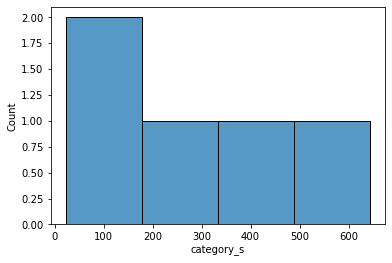

In [31]:
sns.histplot(labeled_df['category_s'].value_counts())
plt.show()

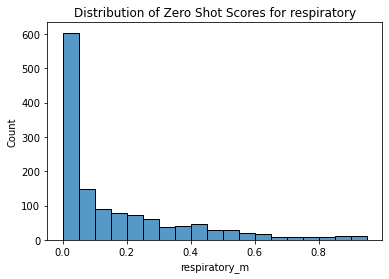

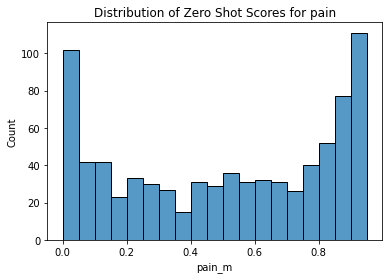

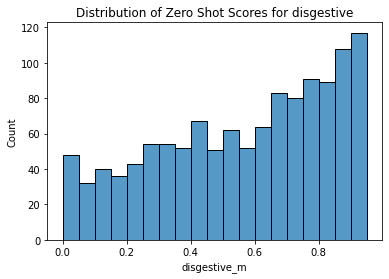

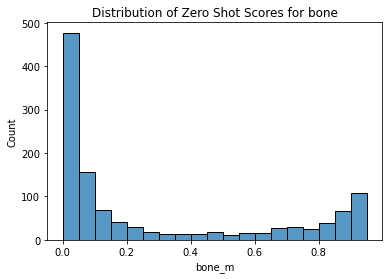

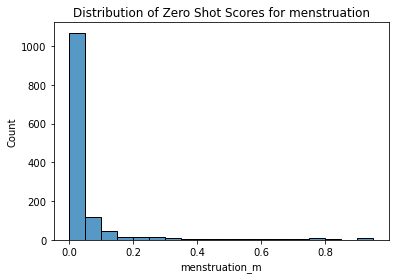

In [32]:
bins = list(range(0,20))
hbins = [item/len(bins) for item in bins]
for topic in old_sides:
    plt.title('Distribution of Zero Shot Scores for ' + topic)
    sns.histplot(x = topic+"_m", data = labeled_df, bins = hbins)
    plt.show()